<a href="https://colab.research.google.com/github/shreyamhetre/DSBDA/blob/lab5/DSBDA_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analytics- I - Linear RegressionTITLE: Data Analytics- II – Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report , recall_score , accuracy_score , f1_score , precision_score

In [4]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.shape

(400, 5)

In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

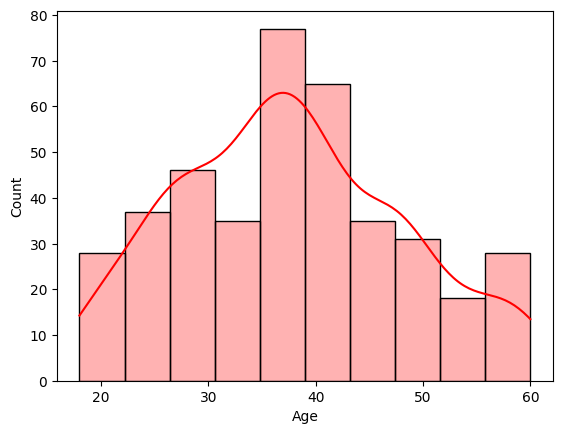

In [12]:
sns.histplot(df["Age"] , kde= True, color='red', alpha=0.3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

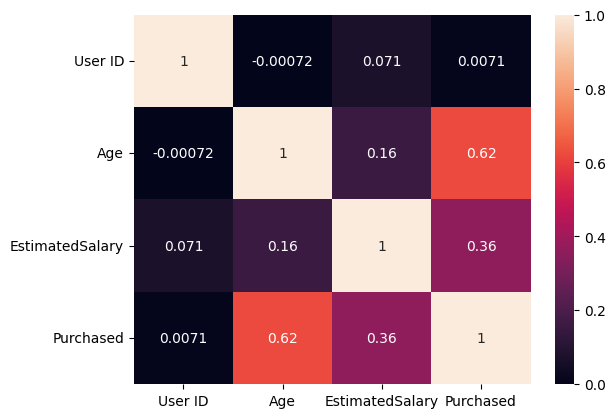

In [13]:
sns.heatmap(df.corr() , annot = True)
plt.show

In [14]:
x = df[["Age" , "EstimatedSalary"]]
y = df["Purchased"]

In [16]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x ,y, test_size =0.2, random_state=42)

In [19]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((320, 2), (80, 2), (320,), (80,))

model building

In [22]:
model = LogisticRegression(n_jobs=-1)

In [24]:
model.fit( x_train , y_train)

LogisticRegression(n_jobs=-1)

In [25]:
y_pred = model.predict(x_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


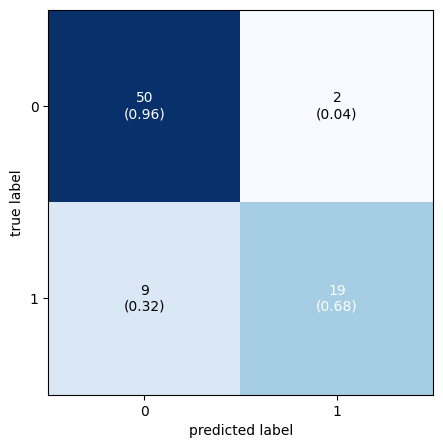

In [27]:
plot_confusion_matrix(conf_mat=cm , show_normed = True , figsize=(5,5))
plt.show()

In [28]:
print(f"TN the value is {cm[0][0]}")
print(f"FP the value is {cm[0][1]}")
print(f"TN the value is {cm[1][0]}")
print(f"FP the value is {cm[1][1]}")

TN the value is 50
FP the value is 2
TN the value is 9
FP the value is 19


In [29]:
print(f"accuracy score is {accuracy_score(y_test, y_pred)}")

accuracy score is 0.8625


In [30]:
print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")

Error rate is 0.13749999999999996


In [31]:
print(f"precision score is {precision_score(y_test, y_pred)}")

precision score is 0.9047619047619048


In [32]:
print(f"Recall score is {recall_score(y_test, y_pred)}")

Recall score is 0.6785714285714286


In [33]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

